In [1]:
# importing all the essential libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import math

import random

In [2]:
# reading the final dataset
data=pd.read_csv('dataset/merged.csv',low_memory=False)

In [3]:
# columns that are needed to be converted


column_type=['Pressure_dbar',
             'Temperature_Celcius',
             'salinity_pss',
             'Sigma_theta_kg_m_pow_minus_3',
             'depth_m',
             'oxygen_mu_molkg_pow_minus_1',
             'oxygen_saturation_percentage',
             'nitrate_mu_mol_kg_pow_minus_1',
             'chl_a_mg_m_pow_minus_3',
             'b_bp700_m_pow_minus_1',
             'POC_milli_mol_m_pow_minus_3',
             'pH_insitu_total','pH_25C_total',
             'TALK_micro_mol_kg_pow_minus_1',
             'DIC_micro_mol_kg_pow_minus_1',
             'pCO2_micro_atm','b_bp532_m_pow_minus_1',
             'CDOM_ppb']

In [4]:
# action for column conversion from object to float

for col in column_type:
    data[col]=data[col].astype(float)

In [5]:
# droppoing mbariID column as it contains only 1 value

data.drop(['mbariID'],axis=1,inplace=True)

In [6]:
data.drop(['Type',
           'pressure_QF',
           'temperature_QF',
           'b_bp532_m_pow_minus_1',
           'b_bp532_QF',
          'oxygen_saturation_percentage'],axis=1,inplace=True)

In [7]:
# columns which are having invalid values mixed with valid values

col_list= ["chl_a_mg_m_pow_minus_3" ,
    "b_bp700_m_pow_minus_1" , 
    "POC_milli_mol_m_pow_minus_3" , 
    "pH_insitu_total" , "pH_25C_total" , 
    "TALK_micro_mol_kg_pow_minus_1" , 
    "DIC_micro_mol_kg_pow_minus_1" , 
    "pCO2_micro_atm" , 
    "CDOM_ppb",
    "oxygen_mu_molkg_pow_minus_1",
    "nitrate_mu_mol_kg_pow_minus_1"]
# print(len(col_list))

In [8]:
# val dataframe is the one that would be worked on, 

val=data

In [9]:
# nitrate_mu_mol_kg_pow_minus_1 > 0 only available


val=val[val['nitrate_mu_mol_kg_pow_minus_1']>0]

In [10]:
# dropping all the rows that are having invalid values for some features

for i in col_list:
    val=val[val[i]!=-10000000000.0]
print("after dropping rows, the shape of new dataframe: ",val.shape)
# print("shape of previous dataframe: ",data.shape)
# print("percentage of dropped data: ",((data.shape[0]-val.shape[0])/data.shape[0])*100,"%")

after dropping rows, the shape of new dataframe:  (13631, 38)


In [11]:
col_list=['FloatID', 
          'Station', 
          'longitude_degrees_east',
          'latitude_degrees_north', 
          'latitude_QF', 
          'Pressure_dbar',
          'Temperature_Celcius', 
          'salinity_pss', 
          'salinity_QF',
          'Sigma_theta_kg_m_pow_minus_3', 
          'sigma_theta_QF', 
          'depth_m', 
          'depth_QF',
          'oxygen_mu_molkg_pow_minus_1', 
          'oxygen_QF', 
          'oxygen_saturation_QF',
          'nitrate_mu_mol_kg_pow_minus_1', 
          'nitrate_QF', 
          'chl_a_mg_m_pow_minus_3',
          'chl_a_QF', 
          'b_bp700_m_pow_minus_1', 
          'b_bp700_QF',
          'POC_milli_mol_m_pow_minus_3', 
          'POC_QF', 
          'pH_insitu_total',
          'pH_insitu_QF', 
          'pH_25C_total', 
          'pH_25C_QF',
          'TALK_micro_mol_kg_pow_minus_1', 
          'TALK_QF',
          'DIC_micro_mol_kg_pow_minus_1', 
          'DIC_QF', 
          'pCO2_micro_atm', 
          'pCO2_QF',
          'CDOM_ppb', 
          'CDOM_QF']

In [12]:
# dropping some columns again, but don't know why!!!
val.drop(['region','latitude_QF','salinity_QF','sigma_theta_QF','depth_QF','time','nitrate_QF','chl_a_QF',
         'b_bp700_QF','POC_QF','pH_insitu_QF','pH_25C_QF','TALK_QF','DIC_QF','pCO2_QF','CDOM_QF','oxygen_QF',
         'oxygen_saturation_QF'],axis=1,inplace=True)

In [13]:
# pearson correlation coefficient

cor=val.corr(method="pearson")

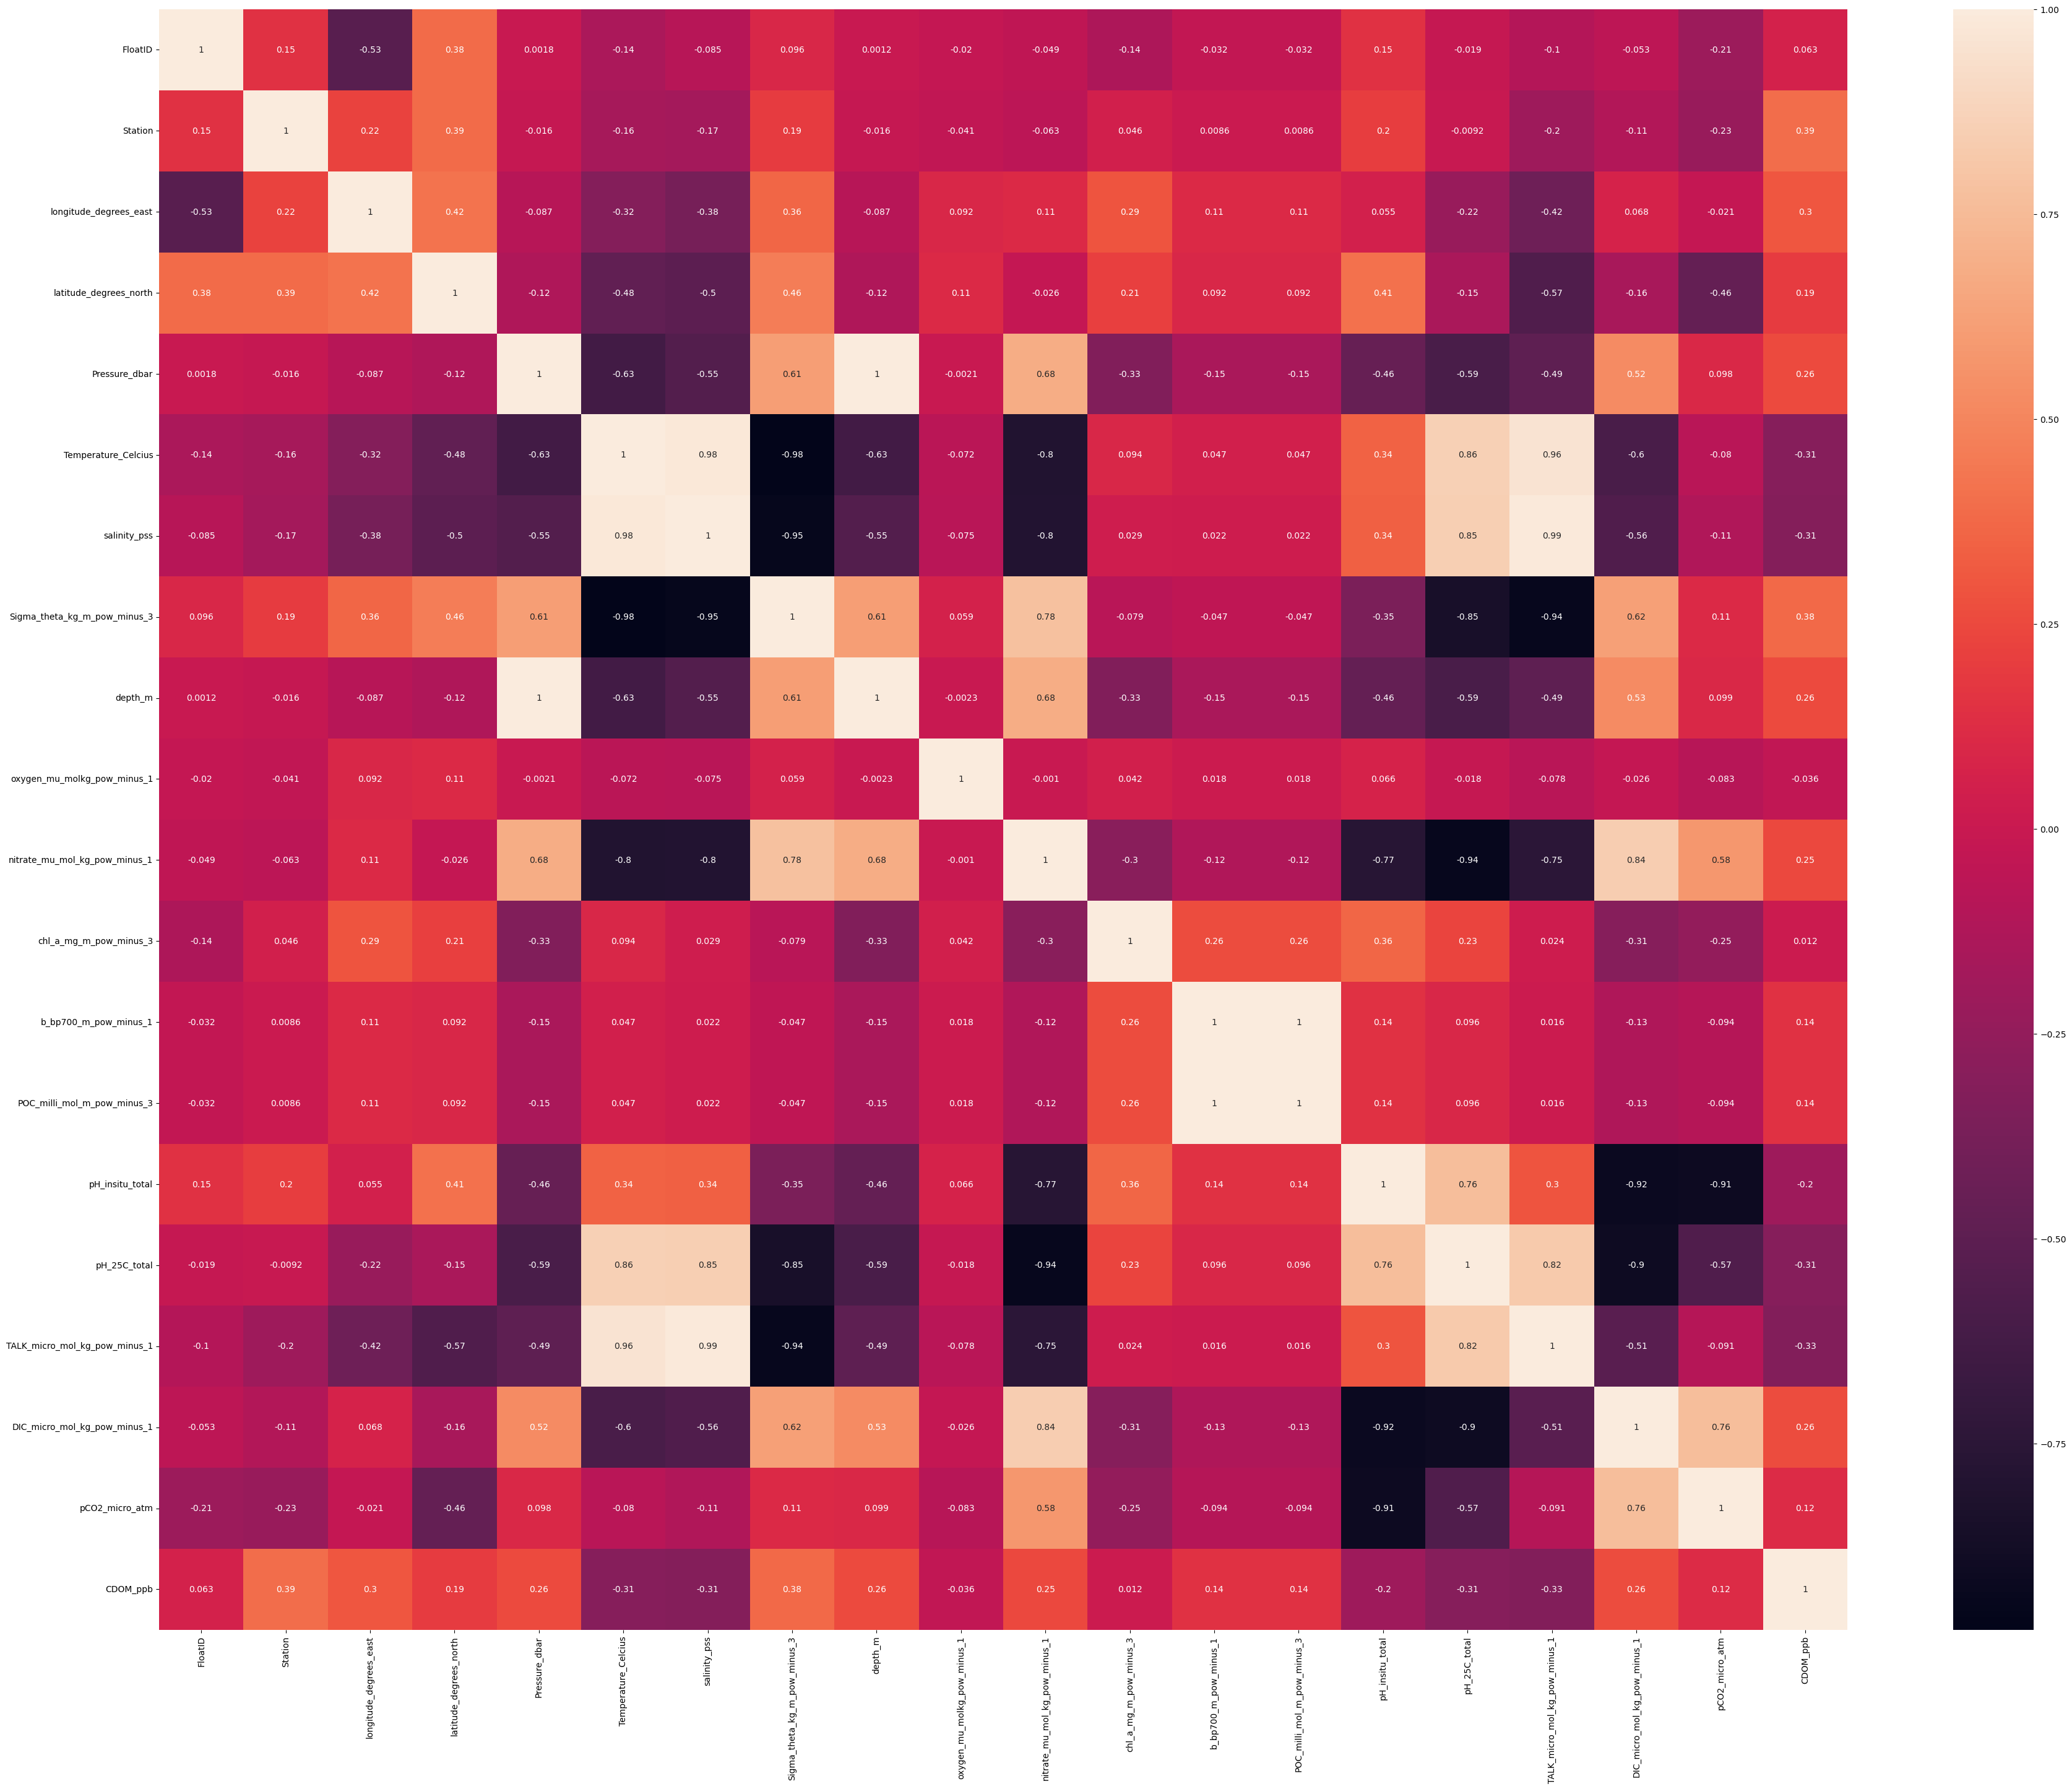

In [14]:
fig, ax = plt.subplots(figsize = (44, 34))
sns.heatmap(cor,annot=True)
plt.show()

In [41]:
# sum of all the correlation co efficient for all columns
# low correlation coefficient has been considered, please take it into account in future

div=val.shape[1]-1
cor_list=[]
cor_col=cor.columns
for i in cor_col:
    sm=0
    for j in cor[i]:
        sm+=abs(j)
    #print("abs value for ",i," is ",sm)
    cor_list.append((i,(sm/div)*100))
cor_list.sort(key=lambda i:i[1], reverse= True)

for i in cor_list:
    print(i)

('pH_25C_total', 52.09728825611904)
('nitrate_mu_mol_kg_pow_minus_1', 50.735367864199546)
('Sigma_theta_kg_m_pow_minus_3', 50.17402386517139)
('Temperature_Celcius', 50.1271119992348)
('salinity_pss', 48.74706960048199)
('TALK_micro_mol_kg_pow_minus_1', 47.818979266293745)
('DIC_micro_mol_kg_pow_minus_1', 47.437384169892546)
('pH_insitu_total', 43.90757766936304)
('depth_m', 40.789291352013194)
('Pressure_dbar', 40.75759489133282)
('latitude_degrees_north', 33.309290312684844)
('pCO2_micro_atm', 31.360778367843988)
('CDOM_ppb', 27.654531634856873)
('longitude_degrees_east', 27.28553098597369)
('chl_a_mg_m_pow_minus_3', 24.161402225221185)
('POC_milli_mol_m_pow_minus_3', 19.330288508240177)
('b_bp700_m_pow_minus_1', 19.329660373755193)
('Station', 19.053397837277988)
('FloatID', 17.031974396664886)
('oxygen_mu_molkg_pow_minus_1', 9.779616642697068)


In [17]:
## custom linear kernel

def Kernel(U,V,sigma):
    return sigma*np.sum(U)*np.sum(V)
def Lineargram(U,V,sigma=0.1):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel(U[i],V[j],sigma)
    return G


def LinearRegressor(x_train1,y_train1,x_test1,y_test,sigma):
    Linear_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    Linear_regressor.fit(Lineargram(x_train1,x_train1,sigma),y_train1)
    y_pred=Linear_regressor.predict(Lineargram(x_test1,x_train1,sigma))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    # print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train1.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    # print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return list([-1])

In [ ]:

a=10.44
while(a<20):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.01,
                                train_size=0.1)
        
    # predicting ph

    # training data
    x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_train=train['Sigma_theta_kg_m_pow_minus_3']
    #test data
    x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_test=test['Sigma_theta_kg_m_pow_minus_3']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)
    print(f'while a={a}')
    val1=LinearRegressor(x_train1,y_train1,x_test1,y_test,a)
    if(val1[0]!=-1):
        
        print(f'adjusted r-squared: {val1[3]}')
    a+=0.01
        

In [ ]:
cnt=0
it=1
r2_list=[]
adj_r2_score_list=[]
mse_list=[]
rmse_list=[]

while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.01,
                                train_size=0.1)
        
    # predicting ph

    # training data
    x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_train=train['Sigma_theta_kg_m_pow_minus_3']
    #test data
    x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_test=test['Sigma_theta_kg_m_pow_minus_3']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=LinearRegressor(x_train1,y_train1,x_test1,y_test,0.6)
    if(val1[0]!=-1):
        mse_list.append(val1[0])
        rmse_list.append(val1[1])
        r2_list.append(val1[2])
        adj_r2_score_list.append(val1[3])
        print(f'adjusted r-squared: {val1[3]}')
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

In [55]:
# linear kernel based SVR called, and the model fitted to the training data
# pre-built function
# we may need it

train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.8)
    
# predicting ph

# training data
x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
y_train=train['Sigma_theta_kg_m_pow_minus_3']
#test data
x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
y_test=test['Sigma_theta_kg_m_pow_minus_3']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)



regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)


# predicting based on test data


# prediction function
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)


# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.006563642727346318
RMSE: 0.0810163114893928
r2 value:  0.9910556972492465
adjusted r2 value:  0.9909929186189309


In [23]:
# degree 2 is better, and by default is 3
# testing on poly kernel, degree parameter for ph25C
# degree=4

for i in [2,3,4,5,6,7,8]:
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.1,
                                train_size=0.5)
        
    # predicting ph

    # training data
    x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_train=train['Sigma_theta_kg_m_pow_minus_3']
    #test data
    x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_test=test['Sigma_theta_kg_m_pow_minus_3']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)
    
    print("degree is: ",i)
    regressor=SVR(kernel='poly',degree=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

degree is:  2
RMSE: 0.11926988267520977
adjusted r2 value:  0.9807859593420293
degree is:  3
RMSE: 0.08433066318061855
adjusted r2 value:  0.9906607121022456
degree is:  4
RMSE: 0.8455842856665337
adjusted r2 value:  0.048973630208228314
degree is:  5
RMSE: 0.28179265768165856
adjusted r2 value:  0.8944511377755212
degree is:  6
RMSE: 123.77779881590669
adjusted r2 value:  -19391.08076273315
degree is:  7
RMSE: 0.28905793267826685
adjusted r2 value:  0.8944171318326686
degree is:  8
RMSE: 40.431581536100005
adjusted r2 value:  -2255.5176665292265


In [33]:
# lesser coef0 is better, and 0.4 is good!!!!
## testing on poly, coef parameter for ph25C

for i in [1,5]:
    
    print("coef0 is: ",i)
    regressor=SVR(kernel='poly',coef0=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

coef0 is:  1
RMSE: 0.0715438921575662
adjusted r2 value:  0.9929345080673111
coef0 is:  5
RMSE: 0.05713785442766948
adjusted r2 value:  0.995493440233156


In [36]:
## final params for poly kernel for ph25C

train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.8)
    
# predicting ph

# training data
x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
y_train=train['Sigma_theta_kg_m_pow_minus_3']
#test data
x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
y_test=test['Sigma_theta_kg_m_pow_minus_3']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)




regressor=SVR(kernel='poly',degree=4,coef0=0)
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
# mse
print("MSE:", mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)


# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.1843657847638375
RMSE: 0.4293783701630038
r2 value:  0.759405600869719
adjusted r2 value:  0.757716907266662


In [42]:
## better prediction for C=4
## it's on RBF, C params


for i in [0.001,0.0005]:

    train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.5)
    
    # predicting ph

    # training data
    x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_train=train['Sigma_theta_kg_m_pow_minus_3']
    #test data
    x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_test=test['Sigma_theta_kg_m_pow_minus_3']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print("C is: ",i)
    regressor=SVR(C=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

C is:  0.001
MSE: 0.1612116722829606
RMSE: 0.4015117336803006
r2 value:  0.7983274406681754
adjusted r2 value:  0.7969119332328948
C is:  0.0005
MSE: 0.3105565954139507
RMSE: 0.5572760495606739
r2 value:  0.5838471294981191
adjusted r2 value:  0.5809262190660778


In [47]:
## epsilon = 0.001 produces better result
# on RBF kernel, epsilon params


for i in [1,9,5,2]:    
    train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.5)
    
    # predicting ph

    # training data
    x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_train=train['Sigma_theta_kg_m_pow_minus_3']
    #test data
    x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_test=test['Sigma_theta_kg_m_pow_minus_3']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    print("epsilon is: ",i)
    regressor=SVR(epsilon=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

epsilon is:  1
MSE: 0.32885885520003755
RMSE: 0.5734621654477631
r2 value:  0.5570602907493941
adjusted r2 value:  0.5539513677808823
epsilon is:  9
MSE: 1.5156942705353857
RMSE: 1.2311353583320503
r2 value:  -1.0558401020739923
adjusted r2 value:  -1.0702697149071678
epsilon is:  5
MSE: 1.4837339852401874
RMSE: 1.2180861977874091
r2 value:  -0.922148236076431
adjusted r2 value:  -0.9356394870869418
epsilon is:  2
MSE: 1.377365406015601
RMSE: 1.173612119064728
r2 value:  -0.8104273118773242
adjusted r2 value:  -0.8231344115912764


In [50]:
## final 
## default is RBF

train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.8)
    
# predicting ph

# training data
x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
y_train=train['Sigma_theta_kg_m_pow_minus_3']
#test data
x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
y_test=test['Sigma_theta_kg_m_pow_minus_3']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)





regressor=SVR(epsilon=1, C=0.001)
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)

# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.45417347447367745
RMSE: 0.673923938196053
r2 value:  0.40500525366462925
adjusted r2 value:  0.4008290807128849


In [22]:
## rbf with coefficient matrix multiplied in exponential power
## it's a custom kernel, custom build we need it!

def Kernel_matmul(U,V,sigma,c,mat):
    return np.exp((-1/(2*(sigma*sigma)))*np.sum(np.power(np.matmul((U-V),mat),c)))
def RBF_gram(U,V,sigma,c,mat):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_matmul(U[i],V[j],sigma,c,mat)
    return G

def RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat):
    RBF_matmul_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    RBF_matmul_regressor.fit(RBF_gram(x_train1,x_train1,sigma,c,mat),y_train1)
    y_pred=RBF_matmul_regressor.predict(RBF_gram(x_test1,x_train1,sigma,c,mat))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    # print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    # print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return list([-1])

In [24]:
mat=np.array([list((val.corr()['pH_25C_total']).drop('pH_25C_total').values)]).T
cnt=0
it=1
r2_RBF_matmul_list=[]
adj_r2_RBF_matmul_score_list=[]
mse_RBF_matmul_list=[]
rmse_RBF_matmul_list=[]
sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))
while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.04,
                                train_size=0.2)
        
    # predicting ph

    # training data
    x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_train=train['Sigma_theta_kg_m_pow_minus_3']
    #test data
    x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_test=test['Sigma_theta_kg_m_pow_minus_3']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat)
    if(val1[0]!=-1):
        mse_RBF_matmul_list.append(val1[0])
        rmse_RBF_matmul_list.append(val1[1])
        r2_RBF_matmul_list.append(val1[2])
        adj_r2_RBF_matmul_score_list.append(val1[3])
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

1 -th iterations
Total  1  number of records found yet!
2 -th iterations
Total  2  number of records found yet!
3 -th iterations
Total  3  number of records found yet!
4 -th iterations
Total  4  number of records found yet!
5 -th iterations
Total  5  number of records found yet!
6 -th iterations
Total  6  number of records found yet!
7 -th iterations
Total  7  number of records found yet!
8 -th iterations
Total  8  number of records found yet!
9 -th iterations
Total  9  number of records found yet!
10 -th iterations
Total  10  number of records found yet!


In [25]:
print(sum(rmse_RBF_matmul_list)/len(rmse_RBF_matmul_list))
print(sum(adj_r2_RBF_matmul_score_list)/len(adj_r2_RBF_matmul_score_list))

0.2863230972562936
0.8865546605090817


In [27]:
# sinh kernel with sigma multiplied and C added afterwards
# it's a custom kernel based on sinh

def Kernel_sinh(U,V,sigma,C):
    return math.sinh((sigma*np.dot(U,V))+C)
def sinh_kernel(U,V,sigma=0.1,C=0):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
#         print(i)
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_sinh(U[i],V[j],sigma,C)
    return G


def sinh(x_train1,y_train1,x_test1,y_test,sigma,C):
    
    sinh_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    # sigma=float(input("paramter for sigma: "))
    # C=float(input("paramter for C: "))
    sinh_regressor.fit(sinh_kernel(x_train1,x_train1,sigma,C),y_train1)
    y_pred=sinh_regressor.predict(sinh_kernel(x_test1,x_train1,sigma,C))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)

    # evaluating the model
    # mse
    # print("y_test: ",y_test,"y_pred",y_pred)
    print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return list([-1])

In [29]:
cnt=0
it=1
r2_custom_sinh_list=[]
adj_r2_custom_sinh_score_list=[]
mse_custom_sinh_list=[]
rmse_custom_sinh_list=[]
sigma=float(input("paramter for sigma: "))
C=float(input("paramter for C: "))
while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.04,
                                train_size=0.2)
        
    # predicting ph

    # training data
    x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_train=train['Sigma_theta_kg_m_pow_minus_3']
    #test data
    x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_test=test['Sigma_theta_kg_m_pow_minus_3']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=sinh(x_train1,y_train1,x_test1,y_test,sigma,C)
    if(val1[0]!=-1):
        mse_custom_sinh_list.append(val1[0])
        rmse_custom_sinh_list.append(val1[1])
        r2_custom_sinh_list.append(val1[2])
        adj_r2_custom_sinh_score_list.append(val1[3])
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

1 -th iterations
MSE: 0.012788621884556869
RMSE: 0.11308678916901332
r2 value:  0.9827753508898609
adjusted r2 value:  0.9821531677470993
Total  1  number of records found yet!
2 -th iterations
MSE: 0.012356433345168763
RMSE: 0.11115949507427948
r2 value:  0.9828953185467048
adjusted r2 value:  0.9822774688364146
Total  2  number of records found yet!
3 -th iterations
MSE: 0.01435715672963595
RMSE: 0.11982135339594505
r2 value:  0.9801080925430407
adjusted r2 value:  0.9793895635664585
Total  3  number of records found yet!
4 -th iterations
MSE: 0.011453133897171456
RMSE: 0.10701931553309177
r2 value:  0.984270343960008
adjusted r2 value:  0.9837021624680692
Total  4  number of records found yet!
5 -th iterations
MSE: 0.0173299779567694
RMSE: 0.1316433741468571
r2 value:  0.9778093025867072
adjusted r2 value:  0.9770077374710179
Total  5  number of records found yet!
6 -th iterations
MSE: 0.016270108309880914
RMSE: 0.12755433473575453
r2 value:  0.9792811397872547
adjusted r2 value:  0

In [ ]:
for i in range(len(mse_custom_sinh_list)):
    print("for ",i,"-th iteration: ")
    print("mse: ",mse_custom_sinh_list[i])
    print("rmse: ",rmse_custom_sinh_list[i])
    print("r2: ",r2_custom_sinh_list[i])
    print("adjusted r2: ",adj_r2_custom_sinh_score_list[i])

In [ ]:
print(sum(rmse_custom_sinh_list)/len(rmse_custom_sinh_list))
print(sum(adj_r2_custom_sinh_score_list)/len(adj_r2_custom_sinh_score_list))

5590


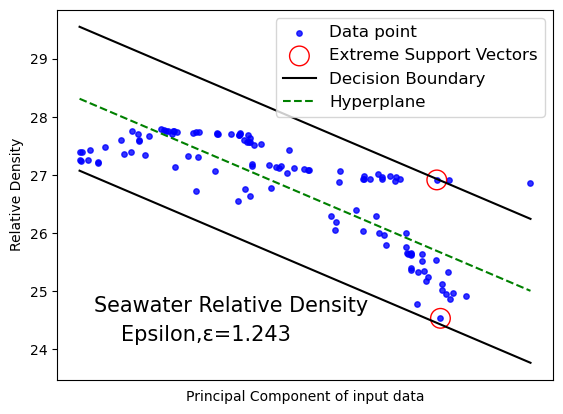

In [29]:
epsilon=1.24
pca = PCA(n_components=1)
a=random.randint(0,10000)
print(a)
train,test = train_test_split(val,
                            random_state=7402,
                            test_size=0.005,
                            train_size=0.01)
    
# predicting ph

# training data
x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
y_train=train['Sigma_theta_kg_m_pow_minus_3']
#test data
x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
y_test=test['Sigma_theta_kg_m_pow_minus_3']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)
y_test1=sc_y.fit_transform(y_test)



regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
x_train1=pca.fit_transform(x_train1)
x_test1=pca.fit_transform(x_test1)
regressor.fit(x_train1,y_train1)
sv_index=regressor.support_
x=x_train1[sv_index]
# print(len(x))


## support vector data
sv_index_x = pca.fit_transform(x)
sv_index_y=y_train1[sv_index]

sv_index_y=sc_y.inverse_transform(sv_index_y.reshape(-1,1))




## modified here
x_test1=sv_index_x
y_test1=sv_index_y


# prediction function and prediction data
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
ind=np.random.randint(0,x_test1.shape[0],size=30)
pred_x=x_test1[ind]
# pred_y=y_pred[ind]
pred_y=y_pred




## training data
ind=np.random.randint(0,x_train1.shape[0],size=40)
train_x=x_train1[ind]
train_y=y_train1[ind]







# plot 
# fig,ax = plt.subplots(1, 1,figsize=(8, 5.2))
# ax.scatter(y_test1, pred_y, cmap='K', edgecolor='b',linewidth='0.5',alpha=1, label='testing points',marker='o', s=12)


# ax.set_xlabel('Observed Area(km $^{2}$)',fontsize=14)
# ax.set_ylabel('Simulated Area(km $^{2}$)',fontsize=14)
# ax.set_xlim([min(y_test1)-100, max(y_test1)+100])
# plt.set_ylim([min(y_test1)-100, max(y_test1)+100])

# find support vectors
positive_instances=[]
negative_instances=[]

for i in range(x_test1.shape[0]):
    if  ((y_test1[i]-pred_y[i]>0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        positive_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]])
    elif ((y_test1[i]-pred_y[i]<0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        negative_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]]) 

# len(positive_instances)+len(negative_instances)

sort_positive=sorted([n for n in positive_instances])
sort_negative=sorted([n for n in negative_instances])


positive_support_vector=sort_positive[-1][1]
negative_support_vector=sort_negative[0][1]



model_support_vectors=np.stack((positive_support_vector,negative_support_vector),axis=-1)
# # visualize the data-set
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xticks([])

ax.set_ylabel("Relative Density")
ax.set_xlabel("Principal Component of input data")
plt.scatter(x_test1,y_test1,marker='o',c='b',s=15,alpha=0.8,label="Data point")

# # plot support vectors
ax.scatter(model_support_vectors[0, :],model_support_vectors[1, :],s=200, linewidth=1,facecolors='none', edgecolors='r', label="Extreme Support Vectors")




max_feature_value=np.amax(x_test1)
min_feature_value=np.amin(x_test1)
datarange = (min_feature_value*1.,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]




for i in range(x_test1.shape[0]):
    if(hyp_x_min==x_test1[i]):
        psv1=pred_y[i]+epsilon
        break


for i in range(x_test1.shape[0]):
    if(hyp_x_max==x_test1[i]):
        psv2=pred_y[i]+epsilon
        break
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k',label="Decision Boundary")

# (w.x+b) = -epsilon
# negative support vector hyperplane
nsv1 = psv1-2*epsilon
nsv2 = psv2-2*epsilon
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

# # (w.x+b) = 0
# # positive support vector hyperplane
db1 = psv1-epsilon
db2 = psv2-epsilon
ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'g--',linewidth=1.5,label="Hyperplane")
ax.text(0.35, 0.2, 'Seawater Relative Density', ha='center', va='center', fontsize=15,transform=ax.transAxes)
ax.text(0.3, 0.12, 'Epsilon,ε=1.243', ha='center', va='center', fontsize=15,transform=ax.transAxes)
plt.legend(fontsize=12)
plt.show()

6381


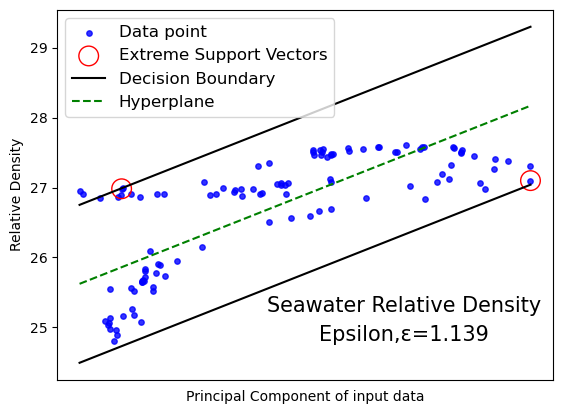

In [30]:
epsilon=1.13
pca = PCA(n_components=1)
a=random.randint(0,10000)
print(a)
train,test = train_test_split(val,
                            random_state=1469,
                            test_size=0.005,
                            train_size=0.01)
    
# predicting ph

# training data
x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
y_train=train['Sigma_theta_kg_m_pow_minus_3']
#test data
x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
y_test=test['Sigma_theta_kg_m_pow_minus_3']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)
y_test1=sc_y.fit_transform(y_test)



regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
x_train1=pca.fit_transform(x_train1)
x_test1=pca.fit_transform(x_test1)
regressor.fit(x_train1,y_train1)
sv_index=regressor.support_
x=x_train1[sv_index]
# print(len(x))


## support vector data
sv_index_x = pca.fit_transform(x)
sv_index_y=y_train1[sv_index]

sv_index_y=sc_y.inverse_transform(sv_index_y.reshape(-1,1))




## modified here
x_test1=sv_index_x
y_test1=sv_index_y


# prediction function and prediction data
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
ind=np.random.randint(0,x_test1.shape[0],size=30)
pred_x=x_test1[ind]
# pred_y=y_pred[ind]
pred_y=y_pred




## training data
ind=np.random.randint(0,x_train1.shape[0],size=40)
train_x=x_train1[ind]
train_y=y_train1[ind]







# plot 
# fig,ax = plt.subplots(1, 1,figsize=(8, 5.2))
# ax.scatter(y_test1, pred_y, cmap='K', edgecolor='b',linewidth='0.5',alpha=1, label='testing points',marker='o', s=12)


# ax.set_xlabel('Observed Area(km $^{2}$)',fontsize=14)
# ax.set_ylabel('Simulated Area(km $^{2}$)',fontsize=14)
# ax.set_xlim([min(y_test1)-100, max(y_test1)+100])
# plt.set_ylim([min(y_test1)-100, max(y_test1)+100])

# find support vectors
positive_instances=[]
negative_instances=[]

for i in range(x_test1.shape[0]):
    if  ((y_test1[i]-pred_y[i]>0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        positive_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]])
    elif ((y_test1[i]-pred_y[i]<0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        negative_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]]) 

# len(positive_instances)+len(negative_instances)

sort_positive=sorted([n for n in positive_instances])
sort_negative=sorted([n for n in negative_instances])


positive_support_vector=sort_positive[-1][1]
negative_support_vector=sort_negative[0][1]



model_support_vectors=np.stack((positive_support_vector,negative_support_vector),axis=-1)
# # visualize the data-set
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xticks([])

ax.set_ylabel("Relative Density")
ax.set_xlabel("Principal Component of input data")
plt.scatter(x_test1,y_test1,marker='o',c='b',s=15,alpha=0.8,label="Data point")

# # plot support vectors
ax.scatter(model_support_vectors[0, :],model_support_vectors[1, :],s=200, linewidth=1,facecolors='none', edgecolors='r', label="Extreme Support Vectors")




max_feature_value=np.amax(x_test1)
min_feature_value=np.amin(x_test1)
datarange = (min_feature_value*1.,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]




for i in range(x_test1.shape[0]):
    if(hyp_x_min==x_test1[i]):
        psv1=pred_y[i]+epsilon
        break


for i in range(x_test1.shape[0]):
    if(hyp_x_max==x_test1[i]):
        psv2=pred_y[i]+epsilon
        break
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k',label="Decision Boundary")

# (w.x+b) = -epsilon
# negative support vector hyperplane
nsv1 = psv1-2*epsilon
nsv2 = psv2-2*epsilon
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

# # (w.x+b) = 0
# # positive support vector hyperplane
db1 = psv1-epsilon
db2 = psv2-epsilon
ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'g--',linewidth=1.5,label="Hyperplane")
ax.text(0.7, 0.2, 'Seawater Relative Density', ha='center', va='center', fontsize=15,transform=ax.transAxes)
ax.text(0.7, 0.12, 'Epsilon,ε=1.139', ha='center', va='center', fontsize=15,transform=ax.transAxes)
plt.legend(fontsize=12)
plt.show()

In [15]:
## rbf with coefficient matrix multiplied in exponential power
## it's a custom kernel, custom build we need it!

def Kernel_matmul(U,V,sigma,c,mat):
    return np.exp((-1/(2*(sigma*sigma)))*np.sum(np.power(np.matmul((U-V),mat),c)))
def RBF_gram(U,V,sigma,c,mat):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_matmul(U[i],V[j],sigma,c,mat)
    return G

def RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat):
    RBF_matmul_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    RBF_matmul_regressor.fit(RBF_gram(x_train1,x_train1,sigma,c,mat),y_train1)
    y_pred=RBF_matmul_regressor.predict(RBF_gram(x_test1,x_train1,sigma,c,mat))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    # print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    # print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return y_pred
    else:
        return -1

In [16]:
mat=np.array([list((val.corr()['Sigma_theta_kg_m_pow_minus_3']).drop('Sigma_theta_kg_m_pow_minus_3').values)]).T

sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))

while(True):   
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.03,
                                train_size=0.4)
        
    # predicting ph

    # training data
    x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_train=train['Sigma_theta_kg_m_pow_minus_3']
    #test data
    x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_test=test['Sigma_theta_kg_m_pow_minus_3']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    val1=RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat)
    if(val1[0]!=-1):
        y_pred_matmul=val1
        y_test_matmul=y_test
        break



In [ ]:
# sinh kernel with sigma multiplied and C added afterwards
# it's a custom kernel based on sinh

def Kernel_sinh(U,V,sigma,C):
    return math.sinh((sigma*np.dot(U,V))+C)
def sinh_kernel(U,V,sigma=0.1,C=0):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
#         print(i)
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_sinh(U[i],V[j],sigma,C)
    return G


def sinh(x_train1,y_train1,x_test1,y_test,sigma,C):
    
    sinh_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()    
    sinh_regressor.fit(sinh_kernel(x_train1,x_train1,sigma,C),y_train1)
    y_pred=sinh_regressor.predict(sinh_kernel(x_test1,x_train1,sigma,C))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    return y_pred

In [ ]:
sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))

while(True):   
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.03,
                                train_size=0.4)
        
    # predicting ph

    # training data
    x_train=train.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_train=train['Sigma_theta_kg_m_pow_minus_3']
    #test data
    x_test=test.drop(['Sigma_theta_kg_m_pow_minus_3'],axis=1)
    y_test=test['Sigma_theta_kg_m_pow_minus_3']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    val1=sinh(x_train1,y_train1,x_test1,y_test,sigma,c)
    if(val1[0]!=-1):
        y_pred_sine=val1
        y_test_sine=y_test
        break


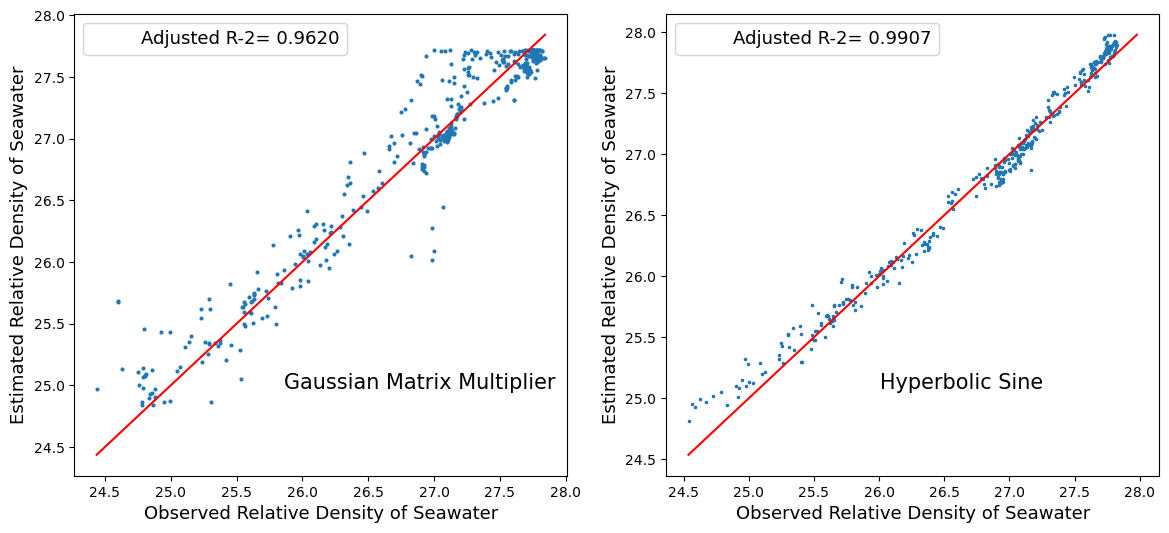

In [22]:
# create a grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# plot the data and add text to each subplot
for i, ax in enumerate(axs):
    if i == 0:
        ax.scatter(list(y_test_matmul['Sigma_theta_kg_m_pow_minus_3']),y_pred_matmul,s=15,marker='.')
        ax.plot([min(min(y_test_matmul['Sigma_theta_kg_m_pow_minus_3']),float(min(y_pred_matmul))),max(max(y_test_matmul['Sigma_theta_kg_m_pow_minus_3']),float(max(y_pred_matmul)))],
                [min(min(y_test_matmul['Sigma_theta_kg_m_pow_minus_3']),float(min(y_pred_matmul))),max(max(y_test_matmul['Sigma_theta_kg_m_pow_minus_3']),float(max(y_pred_matmul)))],
                color='r')
        ax.scatter([],[],label="Adjusted R-2= 0.9620",alpha=0)
        ax.set_xlabel("Observed Relative Density of Seawater",fontsize=13)
        ax.set_ylabel("Estimated Relative Density of Seawater",fontsize=13)
        ax.text(0.7, 0.2, 'Gaussian Matrix Multiplier', ha='center', va='center', fontsize=15,transform=ax.transAxes)


    elif i == 1:
        ax.scatter(list(y_test_sine['Sigma_theta_kg_m_pow_minus_3']),y_pred_sine,s=10,marker='.')
        ax.plot([min(min(y_test_sine['Sigma_theta_kg_m_pow_minus_3']),float(min(y_pred_sine))),max(max(y_test_sine['Sigma_theta_kg_m_pow_minus_3']),float(max(y_pred_sine)))],
                [min(min(y_test_sine['Sigma_theta_kg_m_pow_minus_3']),float(min(y_pred_sine))),max(max(y_test['Sigma_theta_kg_m_pow_minus_3']),float(max(y_pred_sine)))],
                color='r')
        ax.scatter([],[],label="Adjusted R-2= 0.9907",alpha=0)
        ax.set_xlabel("Observed Relative Density of Seawater",fontsize=13)
        ax.set_ylabel("Estimated Relative Density of Seawater",fontsize=13)
        ax.text(0.6, 0.2, 'Hyperbolic Sine', ha='center', va='center', fontsize=15,transform=ax.transAxes)

    ax.legend(fontsize=13)
# plt.suptitle("Estimated vs Observed Seawater Density for Hyperbolic Sine and Gaussian Matrix Multiplier Kernel",fontsize=18)
plt.show()


In [28]:
y_test_matmul['predict']=y_pred_matmul
y_test_matmul.to_csv('matmul_sigma.csv',index=False)
y_test_sine['predict']=y_pred_sine
y_test_sine.to_csv('sine_sigma.csv',index=False)